## Data Preprocessing

In [17]:
import pandas as pd

In [18]:
df= pd.read_csv(r"C:\Users\Admin\Desktop\HK1_2023\BI\Final 1\2017\superstore.csv") 
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [19]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')



# Check if the conversion and removal were successful
df['Order Date'].dt.year.unique()

def convert_currency(value):
    if isinstance(value, str):
        value = value.replace('(', '-').replace(')', '').replace('$', '').replace(',', '')
    return float(value)

# Apply conversion to the relevant columns
df['Profit'] = df['Profit'].apply(convert_currency)
df['Sales'] = df['Sales'].apply(convert_currency)


# Convert Discount to a float
df['Discount'] = df['Discount'].replace('[\%,]', '', regex=True).astype(float)
# Grouping data by month and sub-category
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


# Filtering data from 2020 to 2022 for analysis|
df = df[df['Year'] <=2024]

# Previewing the aggregated data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10


In [20]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month'],
      dtype='object')

In [21]:
df.drop([ 'Ship Date', 'Ship Mode', 'Customer Name', 'Country', 'Postal Code', 
           'Region', 'Customer ID', 'Product Name','City','State','Order Date'], axis=1, inplace=True)
df.columns

Index(['Row ID', 'Order ID', 'Segment', 'Product ID', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month'],
      dtype='object')

In [22]:
# Calculating profit margin as a percentage
df['Profit ratio'] = (df['Profit'] / df['Sales']).round(1) * 100


# Save the updated dataframe to a new CSV file
updated_file_path = r'C:\Users\Admin\Desktop\HK1_2023\BI\Final 1\Models1.csv'
df.to_csv(updated_file_path, index=False)

updated_file_path, df.head()


('C:\\Users\\Admin\\Desktop\\HK1_2023\\BI\\Final 1\\Models1.csv',
    Row ID        Order ID    Segment       Product ID         Category  \
 0       1  CA-2016-152156   Consumer  FUR-BO-10001798        Furniture   
 1       2  CA-2016-152156   Consumer  FUR-CH-10000454        Furniture   
 2       3  CA-2016-138688  Corporate  OFF-LA-10000240  Office Supplies   
 3       4  US-2015-108966   Consumer  FUR-TA-10000577        Furniture   
 4       5  US-2015-108966   Consumer  OFF-ST-10000760  Office Supplies   
 
   Sub-Category     Sales  Quantity  Discount    Profit  Year  Month  \
 0    Bookcases  261.9600         2      0.00   41.9136  2016     11   
 1       Chairs  731.9400         3      0.00  219.5820  2016     11   
 2       Labels   14.6200         2      0.00    6.8714  2016      6   
 3       Tables  957.5775         5      0.45 -383.0310  2015     10   
 4      Storage   22.3680         2      0.20    2.5164  2015     10   
 
    Profit ratio  
 0          20.0  
 1        

In [23]:
#encoding of categorial features
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for i in df.columns:
#     if(df.dtypes[i] == 'object'):
#         df[i] = le.fit_transform(df[i])

# df.info()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   Product ID    9994 non-null   object 
 4   Category      9994 non-null   object 
 5   Sub-Category  9994 non-null   object 
 6   Sales         9994 non-null   float64
 7   Quantity      9994 non-null   int64  
 8   Discount      9994 non-null   float64
 9   Profit        9994 non-null   float64
 10  Year          9994 non-null   int32  
 11  Month         9994 non-null   int32  
 12  Profit ratio  9994 non-null   float64
dtypes: float64(4), int32(2), int64(2), object(5)
memory usage: 937.1+ KB


In [25]:
df.to_csv(r'C:\Users\Admin\Desktop\HK1_2023\BI\Final 1\Models1.csv', index=False)

In [26]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the thresholds for high and low profit ratio and quantity
profit_ratio_threshold = df['Profit ratio'].mean()
quantity_threshold = df['Quantity'].mean()

# Classifying data based on the thresholds
df['Profit Ratio Category'] = np.where(df['Profit ratio'] >= profit_ratio_threshold, 'High', 'Low')
df['Quantity Category'] = np.where(df['Quantity'] >= quantity_threshold, 'High', 'Low')

# Creating a new column for combined categories
df['Combined Category'] = df['Profit Ratio Category'] + '-' + df['Quantity Category']

# Display the first few rows to verify the classification
df.head()



,Row ID,Order ID,Segment,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Year,Month,Profit ratio,Profit Ratio Category,Quantity Category,Combined Category
0,1,CA-2016-152156,Consumer,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136,2016,11,20.0,High,Low,High-Low
1,2,CA-2016-152156,Consumer,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820,2016,11,30.0,High,Low,High-Low
2,3,CA-2016-138688,Corporate,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714,2016,6,50.0,High,Low,High-Low
3,4,US-2015-108966,Consumer,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310,2015,10,-40.0,Low,High,Low-High
4,5,US-2015-108966,Consumer,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164,2015,10,10.0,Low,Low,Low-Low


In [27]:
# Selecting only the relevant columns for clustering
clustering_data = df[['Profit ratio', 'Quantity']]

# Applying KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42).fit(clustering_data)

# Adding the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Save the dataframe with cluster information to a new CSV file
clustered_file_path = r'C:\Users\Admin\Desktop\HK1_2023\BI\Final 1\Models.csv'
df.to_csv(clustered_file_path, index=False)

clustered_file_path, df.head()


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


('C:\\Users\\Admin\\Desktop\\HK1_2023\\BI\\Final 1\\Models.csv',
    Row ID        Order ID    Segment       Product ID         Category  \
 0       1  CA-2016-152156   Consumer  FUR-BO-10001798        Furniture   
 1       2  CA-2016-152156   Consumer  FUR-CH-10000454        Furniture   
 2       3  CA-2016-138688  Corporate  OFF-LA-10000240  Office Supplies   
 3       4  US-2015-108966   Consumer  FUR-TA-10000577        Furniture   
 4       5  US-2015-108966   Consumer  OFF-ST-10000760  Office Supplies   
 
   Sub-Category     Sales  Quantity  Discount    Profit  Year  Month  \
 0    Bookcases  261.9600         2      0.00   41.9136  2016     11   
 1       Chairs  731.9400         3      0.00  219.5820  2016     11   
 2       Labels   14.6200         2      0.00    6.8714  2016      6   
 3       Tables  957.5775         5      0.45 -383.0310  2015     10   
 4      Storage   22.3680         2      0.20    2.5164  2015     10   
 
    Profit ratio Profit Ratio Category Quantity C

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

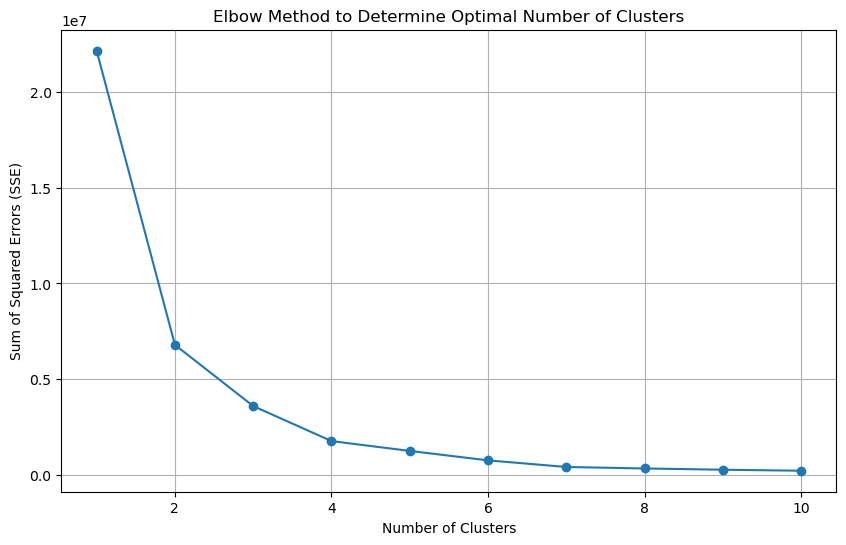

In [28]:
import matplotlib.pyplot as plt

# Range of number of clusters to try
cluster_range = range(1, 11)

# Calculating SSE for each number of clusters
sse = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


In [29]:
# Re-attempting to load the CSV file and filter the data
try:
   
    # Filtering the records where the cluster label is 0
    cluster_0_data = df[df['Cluster'] == 0]

    # Displaying the first few rows of the filtered data
    cluster_0_data_preview = cluster_0_data.head()
except Exception as e:
    cluster_0_data_preview = f"An error occurred: {e}"

cluster_0_data_preview


,Row ID,Order ID,Segment,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Year,Month,Profit ratio,Profit Ratio Category,Quantity Category,Combined Category,Cluster
1,2,CA-2016-152156,Consumer,FUR-CH-10000454,Furniture,Chairs,731.940,3,0.0,219.5820,2016,11,30.0,High,Low,High-Low,0
2,3,CA-2016-138688,Corporate,OFF-LA-10000240,Office Supplies,Labels,14.620,2,0.0,6.8714,2016,6,50.0,High,Low,High-Low,0
5,6,CA-2014-115812,Consumer,FUR-FU-10001487,Furniture,Furnishings,48.860,7,0.0,14.1694,2014,6,30.0,High,High,High-High,0
6,7,CA-2014-115812,Consumer,OFF-AR-10002833,Office Supplies,Art,7.280,4,0.0,1.9656,2014,6,30.0,High,High,High-High,0
8,9,CA-2014-115812,Consumer,OFF-BI-10003910,Office Supplies,Binders,18.504,3,0.2,5.7825,2014,6,30.0,High,Low,High-Low,0


In [30]:
cluster_0_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5496 entries, 1 to 9993
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Row ID                 5496 non-null   int64  
 1   Order ID               5496 non-null   object 
 2   Segment                5496 non-null   object 
 3   Product ID             5496 non-null   object 
 4   Category               5496 non-null   object 
 5   Sub-Category           5496 non-null   object 
 6   Sales                  5496 non-null   float64
 7   Quantity               5496 non-null   int64  
 8   Discount               5496 non-null   float64
 9   Profit                 5496 non-null   float64
 10  Year                   5496 non-null   int32  
 11  Month                  5496 non-null   int32  
 12  Profit ratio           5496 non-null   float64
 13  Profit Ratio Category  5496 non-null   object 
 14  Quantity Category      5496 non-null   object 
 15  Combined 

In [31]:
cluster_0_data.to_csv(r'C:\Users\Admin\Desktop\HK1_2023\BI\Final 1\2017\Models_decide.csv', index=False)